In [5]:
test_dir="C:\\Users\\naray\\Desktop\\Kaggle\\dogvscat\\dataset\\test_set"
train_dir="C:\\Users\\naray\\Desktop\\Kaggle\\dogvscat\\dataset\\training_set"

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size=64

training_set = train_datagen.flow_from_directory(train_dir,
target_size = (100, 100),
batch_size = batch_size,
color_mode='rgb',
class_mode = 'binary',
shuffle=True)

test_set = test_datagen.flow_from_directory(test_dir,
target_size = (100, 100),
batch_size = batch_size,
color_mode='rgb',
class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from keras.optimizers import adam
import numpy as np

In [8]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3)))
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Conv2D(64, (3, 3), input_shape = (100, 100, 3)))
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())

classifier.add(Dense(64))
classifier.add(Activation("relu")) 
classifier.add(Dense(128))
classifier.add(Activation("relu")) 
classifier.add(Dense(activation = 'sigmoid', units=1))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
__________

In [12]:
classifier.fit_generator(training_set,
                        steps_per_epoch=np.ceil(training_set.samples / batch_size),
                        epochs=5,
                        validation_steps=np.ceil(test_set.samples / batch_size),
                         validation_data=test_set
                        )

Epoch 1/5
125/125 [==============================] - 103s 827ms/step - loss: 0.5826 - acc: 0.6914 - val_loss: 0.5524 - val_acc: 0.7275
Epoch 2/5
125/125 [==============================] - 96s 770ms/step - loss: 0.5162 - acc: 0.7386 - val_loss: 0.5076 - val_acc: 0.7490
Epoch 3/5
125/125 [==============================] - 72s 578ms/step - loss: 0.4716 - acc: 0.7740 - val_loss: 0.4983 - val_acc: 0.7525
Epoch 4/5
125/125 [==============================] - 72s 578ms/step - loss: 0.4069 - acc: 0.8126 - val_loss: 0.4710 - val_acc: 0.7810
Epoch 5/5
125/125 [==============================] - 69s 553ms/step - loss: 0.3675 - acc: 0.8316 - val_loss: 0.5085 - val_acc: 0.7790


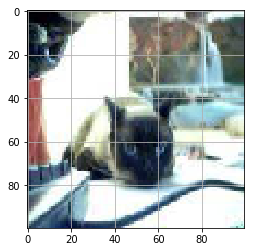

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:\\Users\\naray\\Desktop\\Kaggle\\dogvscat\\dataset\\training_set\\cats\\cat.5.jpg", target_size = (100, 100)) 
plt.imshow(test_image)
plt.grid(None) 
plt.show()

In [6]:
res_list= ["It's a cat !","It's a dog !"]

In [8]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#print(test_image)

[[[  3.   2.   7.]
  [  1.   0.   5.]
  [  0.   0.   4.]
  ...
  [242. 254. 254.]
  [244. 254. 255.]
  [246. 255. 254.]]

 [[  0.   0.   4.]
  [  0.   0.   4.]
  [  0.   0.   4.]
  ...
  [235. 255. 253.]
  [236. 255. 253.]
  [239. 253. 253.]]

 [[  0.   1.   5.]
  [  1.   2.   6.]
  [  2.   3.   7.]
  ...
  [190. 217. 212.]
  [200. 222. 219.]
  [206. 226. 224.]]

 ...

 [[178. 207. 211.]
  [130. 159. 167.]
  [ 79. 107. 121.]
  ...
  [224. 253. 248.]
  [210. 241. 235.]
  [231. 255. 255.]]

 [[129. 156. 165.]
  [ 76. 104. 116.]
  [ 45.  72.  93.]
  ...
  [208. 251. 242.]
  [169. 215. 205.]
  [212. 255. 248.]]

 [[ 48.  74.  89.]
  [ 27.  52.  72.]
  [ 44.  70.  97.]
  ...
  [180. 240. 228.]
  [193. 255. 243.]
  [165. 229. 215.]]]


In [17]:
print(res_list[int(classifier.predict(test_image))])

It's a dog !


In [18]:
classifier.predict(test_image)

array([[1.]], dtype=float32)